
##_ML model for hand-written digit recognition_

Setting up Environment

In [1]:
# Python libraries (helper)
import numpy as np
import matplotlib.pyplot as plt

# Tensorflow and keras
import tensorflow as tf
from tensorflow import keras
import tensorflow.keras as keras
from tensorflow.keras.optimizers import Adam

Loading MNIST dataset


In [2]:
mnist = tf.keras.datasets.mnist
# x -> images, y -> labels
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# creating output classes
class_names = ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine']

11490434/11490434 [==============================] - 0s 0us/step


Properties of dataset

In [3]:
# Dataset shape
# array of 60000 images for training, 28x28 pixels each.
print(x_train.shape)
print(x_train[0].shape)

(60000, 28, 28)
(28, 28)


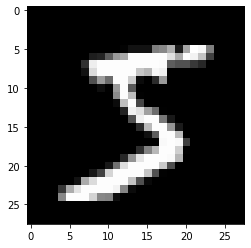

In [4]:
# Example image
# grayscale 28X28 pixels image display using matplotlib
plt.imshow(x_train[0], cmap='gray')

In [5]:
# array representation of training data
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [6]:
# scaling of data
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

Model Training

In [7]:
# model training
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [8]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 14s 6ms/step - loss: 0.2610 - accuracy: 0.9232
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1042 - accuracy: 0.9674
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0708 - accuracy: 0.9779
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0503 - accuracy: 0.9838
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0395 - accuracy: 0.9870
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0289 - accuracy: 0.9906
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0256 - accuracy: 0.9914
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0200 - accuracy: 0.9932
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0173 - accuracy: 0.9938
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0

Evaluation of Model

In [9]:
model.summary()
test_loss, test_accuracy = model.evaluate(x_test, y_test)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (32, 784)                 0         
                                                                 
 dense (Dense)               (32, 128)                 100480    
                                                                 
 dense_1 (Dense)             (32, 128)                 16512     
                                                                 
 dense_2 (Dense)             (32, 10)                  1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________
313/313 [==============================] - 1s 2ms/step - loss: 0.1105 - accuracy: 0.9762


Save the model

In [10]:
keras_mnist_model_path = './mnist_model.h5'
model.save(keras_mnist_model_path)

# New Model 
Loading the saved model

In [11]:
new_model = tf.keras.models.load_model(keras_mnist_model_path)

In [12]:
# array the learned label for each object
predictions = new_model.predict([x_test])
print(np.argmax(predictions[1]))

313/313 [==============================] - 1s 2ms/step
2


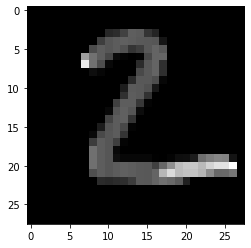

In [13]:
# cross-checking if prediction of model is correct
plt.imshow(x_test[1], cmap='gray')
plt.show()

Image as input

In [14]:
# Python Image library
import PIL
from PIL import Image, ImageOps
image = Image.open('/content/mnist_sample_1_28_28.jpg')
image

Properties of input image

In [15]:
print(image.format)
print(image.size)
print(image.mode)
# making array from imformation about pixels
npimgdata = np.array(image)
print(npimgdata.shape) # 3d array

JPEG
(28, 28)
RGB
(28, 28, 3)


In [16]:
# Function to convert the rgb image to grayscale forming a weighted sum
def rgb2gray(img):
    r = img[:,:,0]
    g = img[:,:,1]
    b = img[:,:,2]
    return (0.2989*r+0.5870*g+0.1140*b)

In [17]:
# read the image file
img = plt.imread('/content/mnist_sample_1_28_28.jpg')
print(img.shape)

(28, 28, 3)


(28, 28)


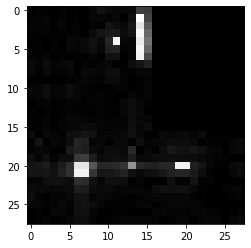

In [18]:
# implementing the function
converted_img = rgb2gray(img)
print(converted_img.shape)
# plotting the converted grayscale image
plt.imshow(converted_img,cmap='gray')
plt.show()

Image -> array

In [19]:
# making array from image pixel data
npimgdata2 = np.array(converted_img)
print(npimgdata2.shape)
#print(npimgdata2)

(28, 28)


Prediction of input using model

In [20]:
prdctn = new_model.predict([npimgdata2])
# data scaling
prdctn2 = tf.keras.utils.normalize(prdctn, axis=1)
# predicted output
print(np.argmax(prdctn2))

1/1 [==============================] - 0s 59ms/step
1


# Converting to TFLite file

In [21]:
import tensorflow as tf

# loading the model
model = tf.keras.models.load_model('/content/mnist_model.h5')
# to implement in android studio 
converter = tf.lite.TFLiteConverter.from_keras_model(model)
# to convert tf.keras model to tflite
tflite_model = converter.convert()
# renaming the tflite model
open("converted_model.tflite", "wb").write(tflite_model)

475516

## THE END :)